# How are in-demand skills trending for Data Analysts?
## Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand
### Import Libraries and Data

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
import seaborn as sns
import adjustText

df = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Python_Data_Analytics_Course\\CSVs\\data_jobs.csv")
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

1. Create a pivot with the months and the top 7 skills for Data Analyst in yhe United States

In [3]:
df_DA_US = df.copy()

df_DA_US = df_DA_US[(df_DA_US['job_country'] == 'United States') & (df_DA_US['job_title_short'] == 'Data Analyst')]

df_DA_US['month'] = df_DA_US['job_posted_date'].dt.month

df_skills = df_DA_US[['job_skills','month']].explode('job_skills')
df_skills = df_skills.dropna()

df_skills = df_skills.pivot_table(index='month', columns='job_skills',aggfunc='size')

# Sort columns by their total frequency (descending)
df_skills = df_skills[df_skills.sum().sort_values(ascending=False).index]

df_skills = df_skills.iloc[: ,:7]

# Convert month number (index) to abbreviated month name and add as a new column
df_skills['month'] = df_skills.index.map(lambda x: dt.date(1900, x, 1).strftime('%b'))

df_skills


job_skills,sql,excel,tableau,python,sas,r,power bi,month
month,,,,,,,,
1,4601.0,3592.0,2488.0,2254.0,1832.0,1513.0,1337.0,Jan
2,3168.0,2587.0,1676.0,1618.0,1212.0,1045.0,1122.0,Feb
3,3226.0,2661.0,1804.0,1683.0,1238.0,1141.0,1054.0,Mar
4,3220.0,2549.0,1789.0,1679.0,1302.0,1038.0,1057.0,Apr
5,2581.0,2118.0,1432.0,1349.0,972.0,867.0,860.0,May
6,2862.0,2382.0,1628.0,1609.0,984.0,1017.0,989.0,Jun
7,2609.0,2118.0,1533.0,1438.0,996.0,881.0,881.0,Jul
8,3414.0,2731.0,1951.0,2025.0,1276.0,1271.0,1208.0,Aug
9,2295.0,1801.0,1353.0,1229.0,856.0,746.0,820.0,Sep


2. Calculate Percentage of Total Jobs

In [4]:
totlal_by_month = df_DA_US.groupby('month').size()

totlal_by_month

month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [5]:
df_skills.iloc[: , :7] = df_skills.iloc[: , :7].div(totlal_by_month/100 ,axis = 0).round(0)

df_skills


job_skills,sql,excel,tableau,python,sas,r,power bi,month
month,,,,,,,,
1,54.0,42.0,29.0,27.0,22.0,18.0,16.0,Jan
2,52.0,42.0,27.0,26.0,20.0,17.0,18.0,Feb
3,52.0,43.0,29.0,27.0,20.0,18.0,17.0,Mar
4,53.0,42.0,30.0,28.0,22.0,17.0,17.0,Apr
5,52.0,42.0,29.0,27.0,19.0,17.0,17.0,May
6,50.0,42.0,29.0,28.0,17.0,18.0,17.0,Jun
7,50.0,41.0,29.0,28.0,19.0,17.0,17.0,Jul
8,51.0,41.0,29.0,31.0,19.0,19.0,18.0,Aug
9,49.0,39.0,29.0,26.0,18.0,16.0,18.0,Sep


3. Plot Monthly Skill Demand

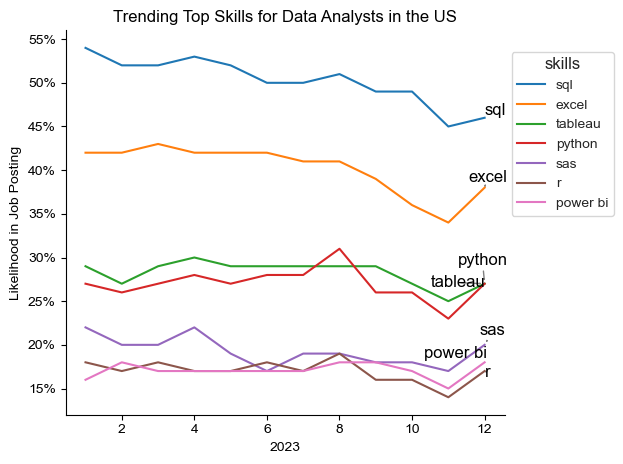

In [6]:
df_plot = df_skills.iloc[: , :7]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), title='skills', fontsize='small', title_fontsize='medium')
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0f}%'))

# annotate the plot with the top 7 skills using plt.text()
texts = []
for i in range(7):
    text = plt.text(12, df_plot.iloc[-1, i], df_plot.columns[i], color='black')
    texts.append(text)
adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.tight_layout()
plt.show()